In [140]:
#!/usr/bin/env python
# Plots data in binary dumps.
# Usage: python plot.py nl-shwave.0024.bin

from numpy import *
import sys
from matplotlib import use
use('Agg')
from matplotlib import pyplot

%matplotlib inline

/opt/gridware/depots/74ad4a9a/el7/pkg/apps/anaconda3/2.5.0/bin/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [141]:
#
# Read binary file
#
try:
  file = open('../../bin/rt.1330.bin','rb')
except:
  print('Usage: ./read.py <binary_dump>')
  sys.exit()

file.seek(0,2)
eof = file.tell()
file.seek(0,0)

coordsys = fromfile(file,dtype=int32,count=1)[0]

#nx,ny,nz = fromfile(file,dtype=int32,count=7)[:3]

ndata = fromfile(file,dtype=int32,count=7)[:7]
nx= ndata[0]
ny= ndata[1]
nz= ndata[2]


gamma1,cs = fromfile(file,dtype=float,count=2)

t,dt = fromfile(file,dtype=float,count=2)

x = fromfile(file,dtype=float,count=nx)
y = fromfile(file,dtype=float,count=ny)
z = fromfile(file,dtype=float,count=nz)

shape = (ny,nx)
count = prod(shape)

rho = fromfile(file,dtype=float,count=count).reshape(shape)
m1 = fromfile(file,dtype=float,count=count).reshape(shape)
m2 = fromfile(file,dtype=float,count=count).reshape(shape)
m3 = fromfile(file,dtype=float,count=count).reshape(shape)
e = fromfile(file,dtype=float,count=count).reshape(shape)
b1 = fromfile(file,dtype=float,count=count).reshape(shape)
b2 = fromfile(file,dtype=float,count=count).reshape(shape)
b3 = fromfile(file,dtype=float,count=count).reshape(shape)

if file.tell() != eof: print('Error: Too few bytes read.')

file.close()

In [142]:
print(shape)
print(nx,ny,nz)
print(ndata)
print(t,dt)
print(gamma1,cs)
print(coordsys)
print(count)


(120, 120)
120 120 1
[120 120   1   8   0   0   0]
665.040658766 0.0648969668853
0.666666667 0.0
-1
14400


In [143]:
print(y[0],y[1],y[63],y[119])
print(x[0],x[1],x[63],x[119])
print(rho.shape)
print(rho[0][0],rho[0][30],rho[0][63],rho[0][118],rho[0][119])
m7=m2/rho
lay=4
v2=m2/rho
#print(rho[5][0],rho[5][30],rho[5][63],rho[5][119])
print(rho[lay][0],rho[lay][1],rho[lay][30],rho[lay][63],rho[lay][117],rho[lay][118],rho[lay][119])
print(m7[lay][0],m7[lay][1],m7[lay][30],m7[lay][63],m7[lay][117],m7[lay][118],m7[lay][119])
print(m7[:,59])
print(rho[:,59])

135243.381125 182643.483375 3121449.82287 5775855.54887
18611.62875 51928.68625 2117586.25125 3983341.47125
(120, 120)
1.87195984701e-05 1.865776875e-05 1.8816242554e-05 1.87308016502e-05 1.87313873793e-05
5.56675264963e-06 5.56653944689e-06 5.57065354023e-06 5.72451869515e-06 5.57853139542e-06 5.57707289031e-06 5.57433082477e-06
3.84892397186 8.63795079092 -2.09234268502 -17.1632678295 -6.48947237773 -5.67902359867 -3.13971047614
[ -3.20628293e+01  -1.06841364e+02   2.64501452e+00   1.85668811e+02
   1.84748099e+02   6.27805293e+01  -6.52163410e+00  -1.08196241e+02
  -9.82188635e+01  -1.33484059e+02  -7.89687993e+00   1.67783823e+02
   5.17566894e+02   3.53285120e+02  -5.65472322e+02  -8.98531561e+02
  -3.81900583e+02   9.55884351e+01   6.27865281e+02   2.05334055e+02
  -6.76491715e+02  -8.02381746e+02  -4.48546174e+01   5.45318076e+02
   9.16124883e+02   5.61386661e+02  -4.16319242e+02  -8.82559082e+02
  -4.93043935e+02   1.22706500e+01   3.96005897e+02   6.57095090e+02
   8.58496158

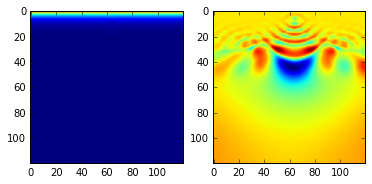

In [144]:
#
# Plot density field
#
fig1,ax1 = pyplot.subplots(1,2,num=1)

ax1[0].imshow(rho)

ax1[1].imshow(v2)


#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

#imgplot = plt.imshow(rho)
#imgplot.set_cmap('spectral')

#plt.plot(rho[96,:])
#print rho[96][:]




#fig1.savefig('fig1.png',dpi=fig1.get_dpi())
